# Lab | Avila Bible 

In this lab, we will explore the [**Avila Bible dataset**](https://archive.ics.uci.edu/ml/datasets/Avila) which has been extracted from 800 images of the 'Avila Bible', an XII century giant Latin copy of the Bible. The prediction task consists in associating each pattern to a copyist. You will use supervised learning algorithms to figure out what feature patterns each copyist are likely to have and use our model to predict those copyist.

-----------------------------------------------------------------------------------------------------------------

## Before your start:
    - Read the README.md file,
    - Comment as much as you can and use the APIla-bible in the README.md,
    - Happy learning!

In [1]:
# Import your libraries
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/diego/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


![machine-learning](https://miro.medium.com/proxy/1*halC1X4ydv_3yHYxKqvrwg.gif)

The Avila data set has been extracted from 800 images of the the **Avila Bible**, a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain. The palaeographic analysis of the  manuscript has  individuated the presence of 12 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

## What am I expected to do?

Well, your prediction task consists in associating each pattern to one of the 8 monks we will be evaluating (labeled as:  Marcus, Clarius, Philippus, Coronavirucus, Mongucus, Paithonius, Ubuntius, Esequlius). For that aim, you should: 
- Train a minimum of 4 different models
- Perform a minimum of 4 Feature Extraction and Engineering techniques
- Must contain a summary of the machine learning tools and algorithms
- and the results or the score obtained with each of them

You won't get much more instructions from now on. Remember to comment your code as much as you can. Keep the requirements in mind and have fun! 

Just one last piece of advice, take a moment to explore the data, remember this dataset contains two files: **train** and **test**. You will find both files in `data` folder. The **test** files contains the data you will predict for, therefore it does not include the labels.
Use the **train** dataset as you wish, but don't forget to split it into **train** and **test** again so you can evaluate your models. Just be sure to train it again with the whole data before predicting.
We have also included a **sample submission** which is of the exact shape and format you must use when evaluating your predictions against the groundtruth through the `APIla-bible`. It won't work unless it is the exact same shape. 



#### Add info --> https://archive.ics.uci.edu/ml/datasets/Avila

#### Lets type down some notes after checking the statement:
- Data: 2 sets, 1 for training and other for testing
- Data training: 11 vars --> 10 continuos, 1 categorical
    - Continuous: text/writing characteristics
    - Categorical: the names of the monks
- Data Testing: 10 vars --> 10 continuos
- Nulls: No
- Aim: train the model to obtain y = the categorical variable --> the monks --> MULTICLASS
- Solution: as we already have categories (monks) and our y is a categorical var (MULTICLASS), we will use a supervised classification model
- Possible Models:
    - Inherently multiclass:
        - Logistic Regression (multinomial)
        - K-Nearest Neighbors (K-NN)
        - Suppor Vector Machine (SVM) (Linear SVC (crammer_singer))
        - Naive Bayes (Gaussian)
        - Decision Tree
        - Esemble models (combination of models): Random Forest, 
    - Multiclass as One-Vs-The-Rest:
        - Gradient Boosting

#### Train dataset

In [2]:
traindf = pd.read_csv('../data/training_dataset.csv', index_col=0)

In [3]:
print(traindf.shape)
traindf.head()

(12017, 11)


,0,1,2,3,4,5,6,7,8,9,10
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus


#### 1st lets recheck we don't have nulls and dtypes

In [4]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12017 entries, 0 to 12016
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12017 non-null  float64
 1   1       12017 non-null  float64
 2   2       12017 non-null  float64
 3   3       12017 non-null  float64
 4   4       12017 non-null  float64
 5   5       12017 non-null  float64
 6   6       12017 non-null  float64
 7   7       12017 non-null  float64
 8   8       12017 non-null  float64
 9   9       12017 non-null  float64
 10  10      12017 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.1+ MB


#### Ok, not nulls, all float, just 1 object --> the monks --> lets check the frenquency

In [5]:
monks = traindf["10"].value_counts()
monks

Marcus           5107
Clarius          2362
Philippus        1360
Coronavirucus    1009
Mongucus          640
Paithonius        600
Ubuntius          512
Esequlius         427
Name: 10, dtype: int64

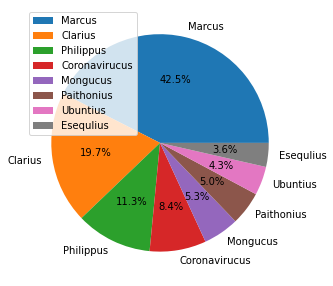

In [6]:
f, ax = plt.subplots(figsize=(15,5))
ax.pie(monks, labels=monks.keys(), autopct='%1.1f%%')
ax.legend(labels=monks.keys(), loc=2)

#### As we can see there is a big difference between the freq of some of the classes. This could result in a problem for predicting smaller clases. However, lets 1st keep with our descriptive analysis and once we test our model, if we see that the smallest classes are not predicted correctly, we can use an undersample or oversample method

In [7]:
monks_u = traindf["10"].unique()
r = range(1,len(monks_u)+1)

In [8]:
traindf["10"] = traindf["10"].replace(monks_u,r)

#### As as multiclass prediction, we need our monks column to be numbers

In [9]:
traindf.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,1
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,2
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,3
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,3
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,3


#### Lets split our data in cat and continuos

In [10]:
X = traindf.iloc[:,:10]
y = traindf.iloc[:,10:]

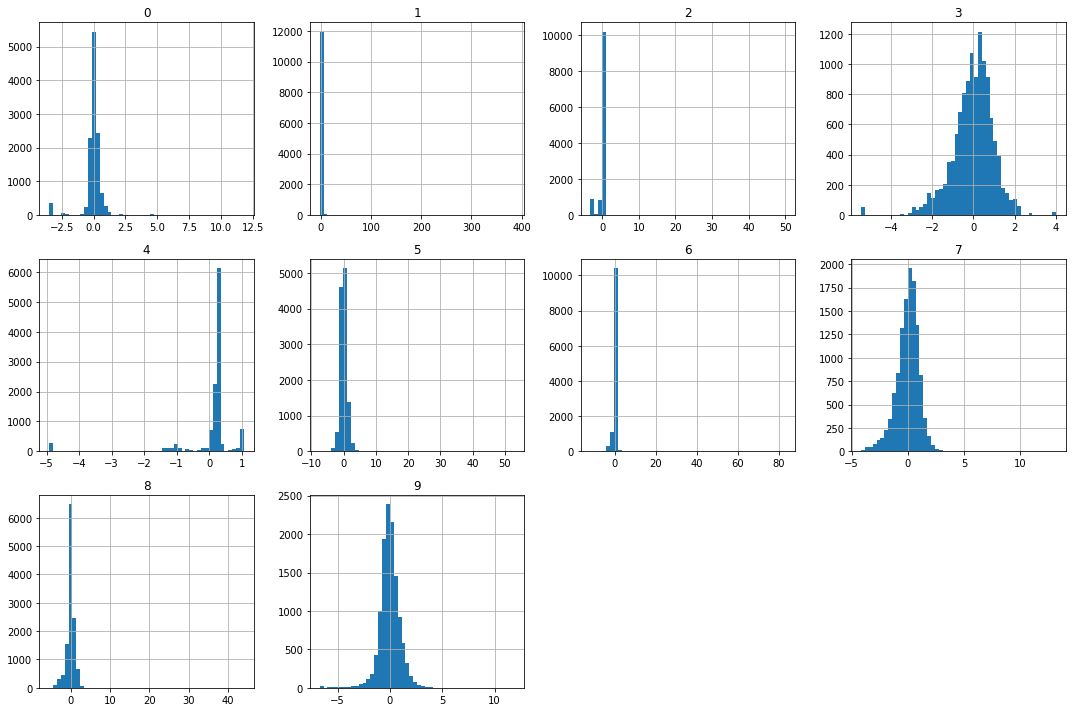

In [11]:
figure = plt.figure(figsize=(15,10))

for n, col in enumerate(X.columns):
    ax = figure.add_subplot(3,4,n+1)
    ax.set_title(col)
    X[col].hist(ax=ax, bins=50)
    
figure.tight_layout() #this feature separate the graphs correctly
plt.show()

#### We can observe that some columns, as 3, 7,8 and 9 are quite standardize. However other columns like 1 and 2 have some outliers and look really right skewed

In [12]:
X.skew()

0     2.761157
1    97.835632
2     7.182287
3    -0.940973
4    -3.751961
5     9.412543
6    22.273995
7    -0.438828
8     4.843486
9    -0.580310
dtype: float64

In [13]:
X.describe()

,0,1,2,3,4,5,6,7,8,9
count,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000
mean,0.021280,0.030684,-0.000379,-0.022127,0.006801,-0.001279,0.032540,-0.006720,-0.011368,-0.026942
std,1.004481,3.661030,1.072319,1.002045,0.963679,1.108192,1.245215,1.012995,1.085821,0.985799
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.164819,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.542563,0.172340,-0.598658,-0.006326,-0.555747,-0.372457,-0.528135
50%,0.056229,-0.055704,0.214288,0.080127,0.261718,-0.058835,0.220177,0.101115,0.064084,-0.053548
75%,0.216699,0.203385,0.349432,0.601905,0.261718,0.522513,0.446679,0.646377,0.500624,0.491862
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,11.911338


#### After checking the skew of some columns and the big differences between min-max values, we should, at least normalize our data. So, although an standardization method, maybe is not needed (almost all means and medians are close to 0), we will perform diff scale methods and check which might look more normalize and stardadize to use in our models

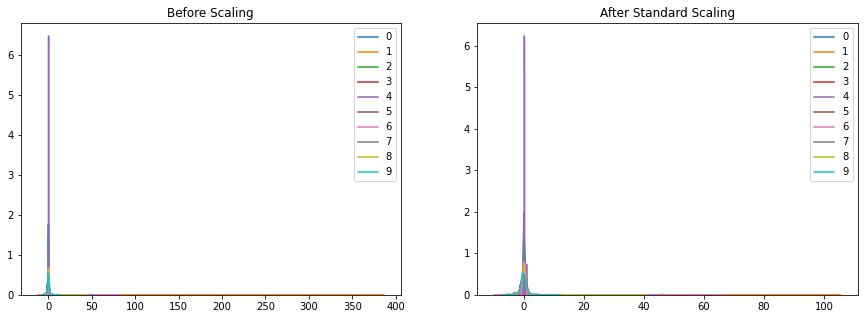

In [14]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

Xss = sc_X.fit_transform(X)

train_SS = pd.DataFrame(Xss)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.set_title('Before Scaling')
for e in X.columns:
    sns.kdeplot(X[e], ax=ax1)
ax2.set_title('After Standard Scaling')
for e in train_SS.columns:
    sns.kdeplot(train_SS[e], ax=ax2)
plt.show()

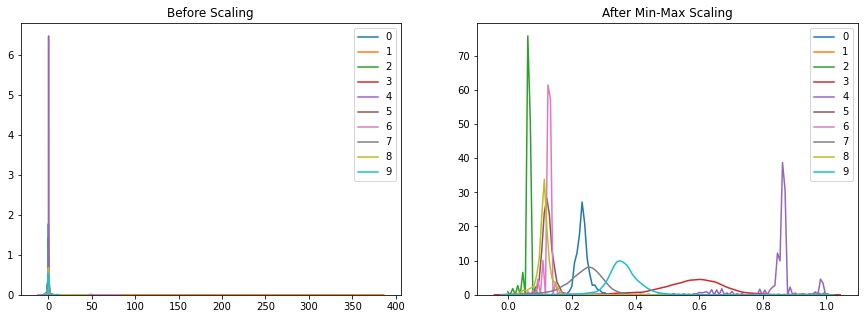

In [15]:
from sklearn.preprocessing import MinMaxScaler
mmc_X = MinMaxScaler()

Xmm = mmc_X.fit_transform(X)

train_MM = pd.DataFrame(Xmm)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.set_title('Before Scaling')
for e in X.columns:
    sns.kdeplot(X[e], ax=ax1)
ax2.set_title('After Min-Max Scaling')
for e in train_MM.columns:
    sns.kdeplot(train_MM[e], ax=ax2)
plt.show()

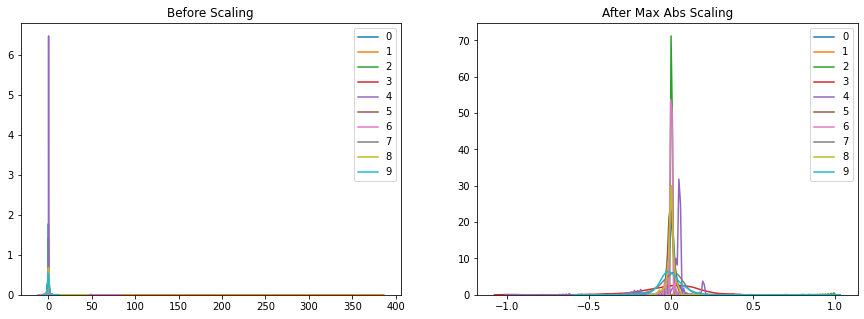

In [16]:
from sklearn.preprocessing import MaxAbsScaler
masc_X = MaxAbsScaler()

Xmasc = masc_X.fit_transform(X)

train_MASC = pd.DataFrame(Xmasc)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.set_title('Before Scaling')
for e in X.columns:
    sns.kdeplot(X[e], ax=ax1)
ax2.set_title('After Max Abs Scaling')
for e in train_MASC.columns:
    sns.kdeplot(train_MASC[e], ax=ax2)
plt.show()

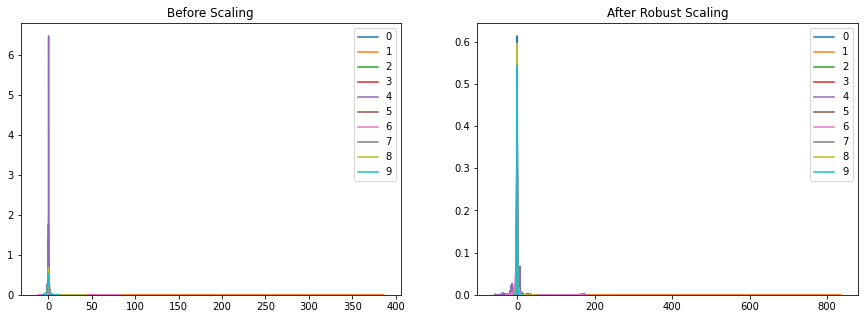

In [17]:
from sklearn.preprocessing import RobustScaler
rsc_X = RobustScaler()

Xrsc = rsc_X.fit_transform(X)

train_RSC = pd.DataFrame(Xrsc)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.set_title('Before Scaling')
for e in X.columns:
    sns.kdeplot(X[e], ax=ax1)
ax2.set_title('After Robust Scaling')
for e in train_RSC.columns:
    sns.kdeplot(train_RSC[e], ax=ax2)
plt.show()

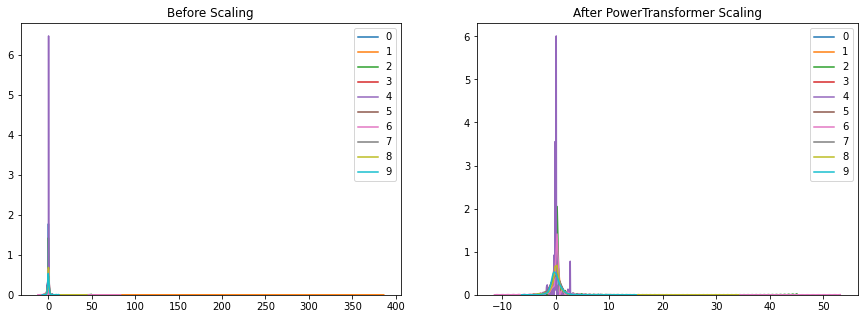

In [18]:
#default mode --> Yeo-Johnson
#Box-Cox mode --> if all data is positive is preferred
from sklearn.preprocessing import PowerTransformer
pt_X = PowerTransformer(method='yeo-johnson')

Xpt = pt_X.fit_transform(X)

train_PT = pd.DataFrame(Xpt)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.set_title('Before Scaling')
for e in X.columns:
    sns.kdeplot(X[e], ax=ax1)
ax2.set_title('After PowerTransformer Scaling')
for e in train_PT.columns:
    sns.kdeplot(train_PT[e], ax=ax2)
plt.show()

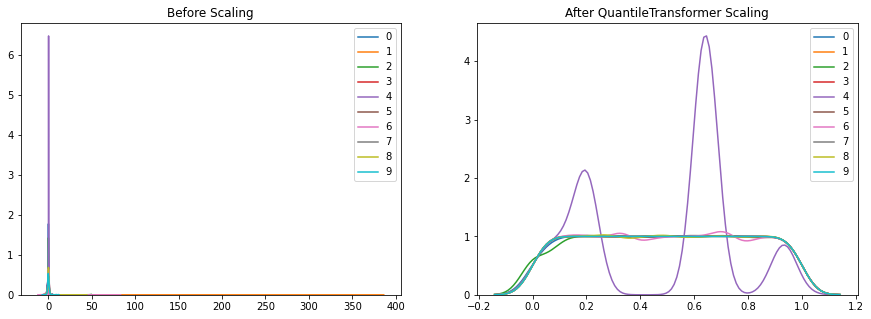

In [19]:
from sklearn.preprocessing import QuantileTransformer
qt_X = QuantileTransformer(n_quantiles=440,output_distribution='uniform',)

Xqt = qt_X.fit_transform(X)

train_QT = pd.DataFrame(Xqt)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.set_title('Before Scaling')
for e in X.columns:
    sns.kdeplot(X[e], ax=ax1)
ax2.set_title('After QuantileTransformer Scaling')
for e in train_QT.columns:
    sns.kdeplot(train_QT[e], ax=ax2)
plt.show()

#### As we see the best method to normalize our data is Abs-Max scale. We spected either this one or Min Max scale as most of our data had an standard distribution

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

#X = train_SS
y = np.ravel(y) #we use np.ravel to change shape (x,1) to (x,)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9613, 10) (2404, 10) (9613,) (2404,)


#### Lets remember again our possible models:
- Possible Models:
    - Inherently multiclass:
        - Logistic Regression (multinomial)
        - K-Nearest Neighbors (K-NN)
        - Suppor Vector Machine (SVM) (Linear SVC (crammer_singer))
        - Naive Bayes (Gaussian)
        - Decision Tree
        - Esemble models (combination of models): Random Forest, 
    - Multiclass as One-Vs-The-Rest:
        - Gradient Boosting

### 1. Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(solver = 'lbfgs', multi_class="multinomial").fit(X_train, y_train) 
  
lreg_pred = lreg.predict(X_test)  

In [22]:
print("Accuracy", accuracy_score(y_test, lreg_pred),"\n")
print("Precision", precision_score(y_test, lreg_pred, average=None),"\n")
print("Recall", recall_score(y_test, lreg_pred, average=None),"\n")
print("F1Score", f1_score(y_test, lreg_pred, average=None),"\n")

Accuracy 0.576955074875208 

Precision [0.55769231 0.39007092 0.52413793 0.82677165 0.1        0.85714286
 0.         0.36764706] 

Recall [0.91666667 0.11827957 0.29230769 0.78358209 0.01020408 0.85279188
 0.         0.22522523] 

F1Score [0.69347826 0.18151815 0.37530864 0.8045977  0.01851852 0.85496183
 0.         0.27932961] 



In [23]:
print(classification_report(y_test,lreg_pred))

              precision    recall  f1-score   support

           1       0.56      0.92      0.69      1044
           2       0.39      0.12      0.18       465
           3       0.52      0.29      0.38       260
           4       0.83      0.78      0.80       134
           5       0.10      0.01      0.02        98
           6       0.86      0.85      0.85       197
           7       0.00      0.00      0.00        95
           8       0.37      0.23      0.28       111

    accuracy                           0.58      2404
   macro avg       0.45      0.40      0.40      2404
weighted avg       0.51      0.58      0.51      2404



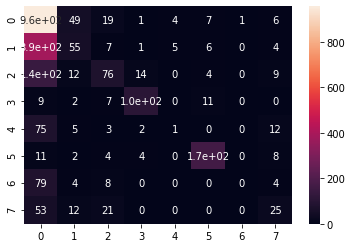

In [24]:
cm_lreg = confusion_matrix(y_test,lreg_pred)
sns.heatmap(cm_lreg,annot=True)

### 2. K-Nearest Neighbors (K-NN)

In [25]:
#computing the best number of neighbors
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics                

k=10
acc_array=np.zeros(k)

for k in np.arange(1,k+1,1): # here k will take values from 1 to 10
    classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train) # k changes after each iteration
    y_pred = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    acc_array[k-1]=acc # store correctly the results

max_acc=np.amax(acc_array)
acc_list=list(acc_array)
k=acc_list.index(max_acc)
print("The best accuracy was with", max_acc, "with k=", k+1)

The best accuracy was with 0.7599833610648918 with k= 1


In [26]:
knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train) 
  
# creating a confusion matrix 
knn_pred = knn.predict(X_test)  

In [27]:
print("Accuracy", accuracy_score(y_test, knn_pred),"\n")
print("Precision", precision_score(y_test, knn_pred, average=None),"\n")
print("Recall", recall_score(y_test, knn_pred, average=None),"\n")
print("F1Score", f1_score(y_test, knn_pred, average=None),"\n")

Accuracy 0.7599833610648918 

Precision [0.80642115 0.63872255 0.71836735 0.95238095 0.55882353 0.98404255
 0.72368421 0.56074766] 

Recall [0.81800766 0.68817204 0.67692308 0.89552239 0.58163265 0.93908629
 0.57894737 0.54054054] 

F1Score [0.81217309 0.66252588 0.6970297  0.92307692 0.57       0.96103896
 0.64327485 0.55045872] 



In [28]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           1       0.81      0.82      0.81      1044
           2       0.64      0.69      0.66       465
           3       0.72      0.68      0.70       260
           4       0.95      0.90      0.92       134
           5       0.56      0.58      0.57        98
           6       0.98      0.94      0.96       197
           7       0.72      0.58      0.64        95
           8       0.56      0.54      0.55       111

    accuracy                           0.76      2404
   macro avg       0.74      0.71      0.73      2404
weighted avg       0.76      0.76      0.76      2404



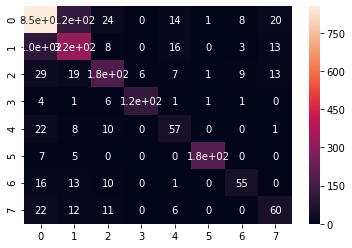

In [29]:
cm_knn = confusion_matrix(y_test,knn_pred)
sns.heatmap(cm_knn,annot=True)

### 3. Suppor Vector Machine (SVM) (Linear SVC (crammer_singer))

In [30]:
from sklearn.svm import LinearSVC 

svm_model_linear = LinearSVC(multi_class="crammer_singer").fit(X_train, y_train) 

svm_pred = svm_model_linear.predict(X_test) 

/home/diego/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [31]:
print("Accuracy", accuracy_score(y_test, svm_pred),"\n")
print("Precision", precision_score(y_test, svm_pred, average=None),"\n")
print("Recall", recall_score(y_test, svm_pred, average=None),"\n")
print("F1Score", f1_score(y_test, svm_pred, average=None),"\n")

Accuracy 0.5694675540765392 

Precision [0.5657971  0.29545455 0.3652968  0.78571429 0.20930233 0.81900452
 0.         0.        ] 

Recall [0.9348659  0.02795699 0.30769231 0.82089552 0.09183673 0.91878173
 0.         0.        ] 

F1Score [0.70494763 0.05108055 0.33402923 0.80291971 0.12765957 0.86602871
 0.         0.        ] 



In [32]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           1       0.57      0.93      0.70      1044
           2       0.30      0.03      0.05       465
           3       0.37      0.31      0.33       260
           4       0.79      0.82      0.80       134
           5       0.21      0.09      0.13        98
           6       0.82      0.92      0.87       197
           7       0.00      0.00      0.00        95
           8       0.00      0.00      0.00       111

    accuracy                           0.57      2404
   macro avg       0.38      0.39      0.36      2404
weighted avg       0.46      0.57      0.47      2404



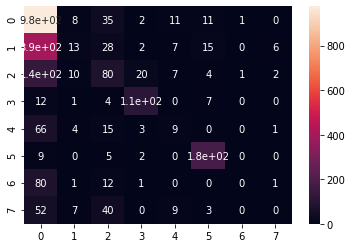

In [33]:
cm_svm = confusion_matrix(y_test,svm_pred)
sns.heatmap(cm_svm,annot=True)

### 4. Naive Bayes (Gaussian)

In [34]:
from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB().fit(X_train, y_train) 

gnb_pred = gnb.predict(X_test) 

In [35]:
print("Accuracy", accuracy_score(y_test, gnb_pred),"\n")
print("Precision", precision_score(y_test, gnb_pred, average=None),"\n")
print("Recall", recall_score(y_test, gnb_pred, average=None),"\n")
print("F1Score", f1_score(y_test, gnb_pred, average=None),"\n")

Accuracy 0.3440099833610649 

Precision [0.57869249 0.29967427 0.30188679 0.64137931 0.171875   0.67032967
 0.14678899 0.18055556] 

Recall [0.2289272  0.39569892 0.06153846 0.69402985 0.67346939 0.61928934
 0.16842105 0.81981982] 

F1Score [0.32807138 0.34105653 0.10223642 0.66666667 0.27385892 0.64379947
 0.15686275 0.29593496] 



In [36]:
print(classification_report(y_test,gnb_pred))

              precision    recall  f1-score   support

           1       0.58      0.23      0.33      1044
           2       0.30      0.40      0.34       465
           3       0.30      0.06      0.10       260
           4       0.64      0.69      0.67       134
           5       0.17      0.67      0.27        98
           6       0.67      0.62      0.64       197
           7       0.15      0.17      0.16        95
           8       0.18      0.82      0.30       111

    accuracy                           0.34      2404
   macro avg       0.37      0.46      0.35      2404
weighted avg       0.45      0.34      0.34      2404



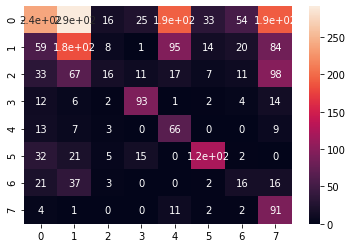

In [37]:
cm_gnb = confusion_matrix(y_test,gnb_pred)
sns.heatmap(cm_gnb,annot=True)

### 4. Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier 

dtree_model = DecisionTreeClassifier().fit(X_train, y_train)

dtree_pred = dtree_model.predict(X_test)

In [39]:
print("Accuracy", accuracy_score(y_test, dtree_pred),"\n")
print("Precision", precision_score(y_test, dtree_pred, average=None),"\n")
print("Recall", recall_score(y_test, dtree_pred, average=None),"\n")
print("F1Score", f1_score(y_test, dtree_pred, average=None),"\n")

Accuracy 0.9771214642262895 

Precision [0.98847262 0.97639485 0.94676806 0.96946565 0.97959184 0.99487179
 0.93877551 0.95535714] 

Recall [0.98563218 0.97849462 0.95769231 0.94776119 0.97959184 0.98477157
 0.96842105 0.96396396] 

F1Score [0.98705036 0.97744361 0.95219885 0.95849057 0.97959184 0.98979592
 0.95336788 0.95964126] 



In [40]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1044
           2       0.98      0.98      0.98       465
           3       0.95      0.96      0.95       260
           4       0.97      0.95      0.96       134
           5       0.98      0.98      0.98        98
           6       0.99      0.98      0.99       197
           7       0.94      0.97      0.95        95
           8       0.96      0.96      0.96       111

    accuracy                           0.98      2404
   macro avg       0.97      0.97      0.97      2404
weighted avg       0.98      0.98      0.98      2404



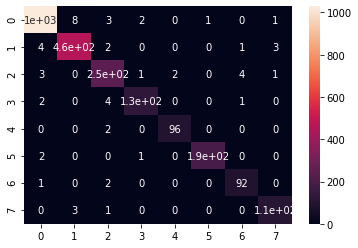

In [41]:
cm_dtree = confusion_matrix(y_test,dtree_pred)
sns.heatmap(cm_dtree,annot=True)

### 5. Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier 

rf_model = RandomForestClassifier().fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

In [43]:
print("Accuracy", accuracy_score(y_test, rf_pred),"\n")
print("Precision", precision_score(y_test, rf_pred, average=None),"\n")
print("Recall", recall_score(y_test, rf_pred, average=None),"\n")
print("F1Score", f1_score(y_test, rf_pred, average=None),"\n")

Accuracy 0.9862728785357737 

Precision [0.9847764  0.98484848 0.97338403 0.99253731 0.98969072 1.
 0.9893617  1.        ] 

Recall [0.99137931 0.97849462 0.98461538 0.99253731 0.97959184 0.98477157
 0.97894737 0.98198198] 

F1Score [0.98806683 0.98166127 0.9789675  0.99253731 0.98461538 0.99232737
 0.98412698 0.99090909] 



In [44]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99      1044
           2       0.98      0.98      0.98       465
           3       0.97      0.98      0.98       260
           4       0.99      0.99      0.99       134
           5       0.99      0.98      0.98        98
           6       1.00      0.98      0.99       197
           7       0.99      0.98      0.98        95
           8       1.00      0.98      0.99       111

    accuracy                           0.99      2404
   macro avg       0.99      0.98      0.99      2404
weighted avg       0.99      0.99      0.99      2404



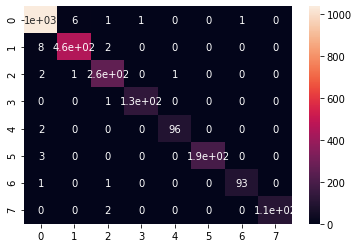

In [45]:
cm_rf = confusion_matrix(y_test,rf_pred)
sns.heatmap(cm_rf,annot=True)

### 6. Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier().fit(X_train, y_train)

gb_pred = gb_model.predict(X_test)

In [47]:
print("Accuracy", accuracy_score(y_test, gb_pred),"\n")
print("Precision", precision_score(y_test, gb_pred, average=None),"\n")
print("Recall", recall_score(y_test, gb_pred, average=None),"\n")
print("F1Score", f1_score(y_test, gb_pred, average=None),"\n")

Accuracy 0.9371880199667221 

Precision [0.91750687 0.91121495 0.93155894 0.99206349 1.         1.
 0.98958333 0.97272727] 

Recall [0.95881226 0.83870968 0.94230769 0.93283582 0.96938776 0.98984772
 1.         0.96396396] 

F1Score [0.93770492 0.87346025 0.93690249 0.96153846 0.98445596 0.99489796
 0.9947644  0.96832579] 



In [48]:
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           1       0.92      0.96      0.94      1044
           2       0.91      0.84      0.87       465
           3       0.93      0.94      0.94       260
           4       0.99      0.93      0.96       134
           5       1.00      0.97      0.98        98
           6       1.00      0.99      0.99       197
           7       0.99      1.00      0.99        95
           8       0.97      0.96      0.97       111

    accuracy                           0.94      2404
   macro avg       0.96      0.95      0.96      2404
weighted avg       0.94      0.94      0.94      2404



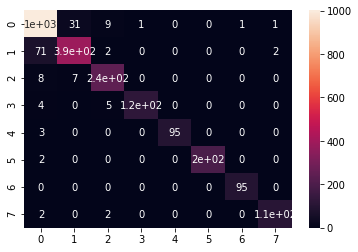

In [49]:
cm_gb = confusion_matrix(y_test,gb_pred)
sns.heatmap(cm_gb,annot=True)

#### After we have done all the test with the diff models this are the top 3 we will train and test with the new data:
    - Random Forest: 0.99
    - Decisiont Tree: 0.98
    - Gradient Boosting: 0.95

#### Test dataset


In [50]:
testdf = pd.read_csv('../data/test_dataset.csv', index_col=0)

In [51]:
print(testdf.shape)
testdf.head()

(8012, 10)


,0,1,2,3,4,5,6,7,8,9
0,-0.017834,0.132725,0.125378,1.357345,0.261718,0.190314,0.182426,0.445253,-0.715453,0.189796
1,-0.202992,-0.000745,-3.210528,-0.527256,0.082961,0.771662,0.144676,0.098572,0.251173,0.745333
2,1.019049,0.211237,-0.155578,-0.311855,0.261718,0.107265,0.484429,0.339303,-0.310094,-0.049630
3,0.451232,-0.267686,0.335206,-0.831336,0.261718,0.024215,0.220177,0.988787,0.032902,0.025485
4,-0.227680,0.109171,0.413447,0.118917,0.172340,0.480988,0.522180,0.091562,0.313536,0.256389


In [52]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8012 entries, 0 to 8011
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8012 non-null   float64
 1   1       8012 non-null   float64
 2   2       8012 non-null   float64
 3   3       8012 non-null   float64
 4   4       8012 non-null   float64
 5   5       8012 non-null   float64
 6   6       8012 non-null   float64
 7   7       8012 non-null   float64
 8   8       8012 non-null   float64
 9   9       8012 non-null   float64
dtypes: float64(10)
memory usage: 688.5 KB


#### Sample submission

In [53]:
sample_submission = pd.read_csv('../data/sample_submission.csv', header=None, index_col=0)

In [54]:
sample_submission.head()

,1
0,
0,Philippus
1,Ubuntius
2,Esequlius
3,Coronavirucus
4,Philippus


`Keep calm and code on!`

# Lets test our Models with the real data

#### 1st We scale the data

In [55]:
#Xss = sc_X.fit_transform(testdf)

#real_test = pd.DataFrame(Xss)

#### Random Forest

In [56]:
rf_pred = rf_model.predict(testdf)

rForest = pd.DataFrame({"rf_pred":rf_pred})

rForest_monks = rForest.replace(r,monks_u)

rForest_monks.to_csv("../data/RandomForest.csv", header=False)

In [57]:
rForest.rf_pred.value_counts()

1    3500
2    1541
3     844
6     651
8     427
4     397
5     377
7     275
Name: rf_pred, dtype: int64

In [58]:
rForest_monks.rf_pred.value_counts()

Marcus           3500
Clarius          1541
Philippus         844
Coronavirucus     651
Paithonius        427
Mongucus          397
Ubuntius          377
Esequlius         275
Name: rf_pred, dtype: int64

#### Decsion Tree

In [61]:
dtree_pred = dtree_model.predict(testdf)

dTree = pd.DataFrame({"dtree_pred":dtree_pred})

dTree_monks = dTree.replace(r,monks_u)

dTree_monks.to_csv("../data/DecisionTree.csv", header=False)

In [62]:
dTree.dtree_pred.value_counts()

1    3435
2    1575
3     856
6     650
8     435
4     411
5     375
7     275
Name: dtree_pred, dtype: int64

In [63]:
dTree_monks.dtree_pred.value_counts()

Marcus           3435
Clarius          1575
Philippus         856
Coronavirucus     650
Paithonius        435
Mongucus          411
Ubuntius          375
Esequlius         275
Name: dtree_pred, dtype: int64

#### Gradient Boosting

In [64]:
gb_pred = gb_model.predict(testdf)

gBoost = pd.DataFrame({"gb_pred":gb_pred})

gBoost_monks = gBoost.replace(r,monks_u)

gBoost_monks.to_csv("../data/GradientBoosting.csv", header=False)

In [65]:
gBoost.gb_pred.value_counts()

1    3630
2    1428
3     829
6     650
8     433
4     391
5     372
7     279
Name: gb_pred, dtype: int64

In [66]:
gBoost_monks.gb_pred.value_counts()

Marcus           3630
Clarius          1428
Philippus         829
Coronavirucus     650
Paithonius        433
Mongucus          391
Ubuntius          372
Esequlius         279
Name: gb_pred, dtype: int64

## What do I do once I have a prediction?

Once you have already trained your model and made a prediction with it, you are ready to check what is the accuracy of it. 

Save your prediction as a `.csv` file.

In [67]:
#your code here

Now you are ready to know the truth! Are you good enough to call yourself a pro?

Lucky you have the ultimate **APIla-bible** which give you the chance of checking the accuracy of your predictions as many times as you need in order to become the pro you want to be. 

## How do I post my prediction to the APIla-bible?

Easy peasy! You should only fulfil the path to your prediction `.csv` and run the cell below! 

In [74]:
#RandomForest
#GradientBoosting
#DecisionTree
my_submission = "../data/DecisionTree.csv"
with open(my_submission) as f:
    res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":f.read()})
res.json()

{'accuracy': 0.9775336994508238,
 'quote': "Great job! That's an impressive score. Will you give it an extra push? Almost at the top, care for a final `boost`?"}

![hope-you-enjoy](https://imgs.xkcd.com/comics/machine_learning.png)

#### Final Conclusions:
    - The best you know your data, the best you use it; in this case the results were better with the original data than we the scaled one. The best scale was Standard, however the result with Max Min normalize were worse
    - Talking about % of training, 80%/20% was always the best option
    - About the model:
        - The most accurate is the RandomForest, however could be overfitted
        - The the DecisionTree and finally the GradientBoosting